# Predict the diabetes based on diagnostic measures

#### About DATA:
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


Columns
> 1.Pregnancies = Number of times pregnant

> 2.Glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

> 3.BloodPressure = Diastolic blood pressure (mm Hg)

> 4.SkinThickness = Triceps skin fold thickness (mm)

> 5.Insulin = 2-Hour serum insulin (mu U/ml)

> 6.BMI = Body mass index (weight in kg/(height in m)^2)

> 7.DiabetesPedigreeFunction = Diabetes pedigree function

> 8.Age = Age (years)

> 9.Outcome = Class variable (0 or 1) 268 of 768 are 1, the others are 0

# Libraries and data import

In [52]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# #this helps to show the output of every line of code
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

In [53]:
data = pd.read_csv('C:\\Users\\khanal\\Desktop\\github\\Diabetes+Prediction+Using+Machine+Learning\\pima-data.csv')


# Data information

In [54]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [55]:
type(data)

pandas.core.frame.DataFrame

In [56]:
data.shape

(768, 10)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    bool   
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


In [58]:
data.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


# Missing value analysis

In [59]:
#data.isna() # this check every data
data.isnull().any().any()
data.isnull().any() # this gives true and false for every varibale
# this gives only one true or false in whole data frame
print(data.isna().sum()) # this gives the number
# no nan values

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64


In [60]:
0 in data.values # return true or false only one
data.isin([0]).any().any() # this also return only one value
data.isin([0]).any() # return true or false in every variable

num_preg         True
glucose_conc     True
diastolic_bp     True
thickness        True
insulin          True
bmi              True
diab_pred       False
age             False
skin             True
diabetes         True
dtype: bool

In [61]:
# no of pregrencies can be 0 but other cann't be zero so we have to fill these values for better fitting
data['glucose_conc']=data['glucose_conc'].replace(0,data['glucose_conc'].mean())
data['diastolic_bp']=data['diastolic_bp'].replace(0,data['diastolic_bp'].mean())
data['thickness']=data['thickness'].replace(0,data['thickness'].mean())
data['insulin']=data['insulin'].replace(0,data['insulin'].mean())
data['bmi']=data['bmi'].replace(0,data['bmi'].mean())
data['skin']=data['skin'].replace(0,data['skin'].mean())

In [62]:
data.isnull().any().any() # now there is no null value

False

In [63]:
data.isin([0]).any()
# note no of pregnencies can be zero and diabetes is true and false

num_preg         True
glucose_conc    False
diastolic_bp    False
thickness       False
insulin         False
bmi             False
diab_pred       False
age             False
skin            False
diabetes         True
dtype: bool

# Data analysis and visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001673238F348>,
      dtype=object)

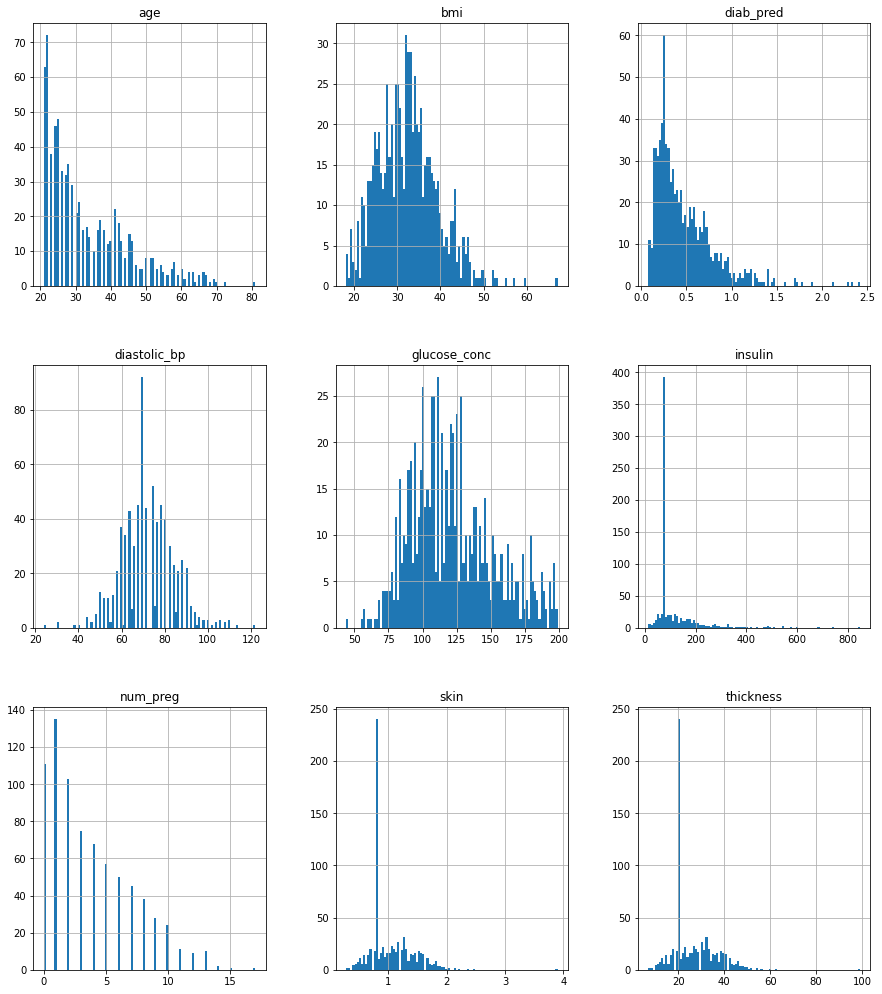

In [64]:
# Histogram of variables
columns = list(data)[0:-1]
data[columns].hist(stacked = False, bins = 100, figsize = (15, 30), layout = (5,3))

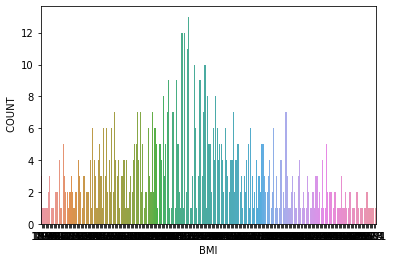

In [65]:
# barplot of bmi data
sns.barplot(x= data.bmi.value_counts().index, y = data.bmi.value_counts().values)
plt.xlabel('BMI')
plt.ylabel(" COUNT")
plt.show()

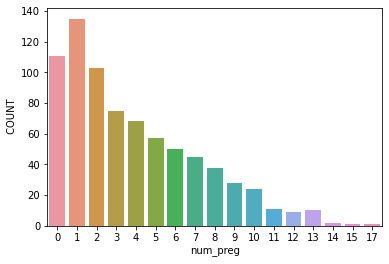

In [66]:
# bar plot of number of pregrent times
sns.barplot(x= data.num_preg.value_counts().index, y = data.num_preg.value_counts().values)
plt.xlabel('num_preg')
plt.ylabel(" COUNT")
plt.show()

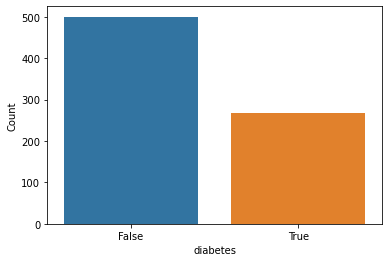

In [67]:
# count plot of diabetis patient or not
sns.countplot(data.diabetes)
plt.xlabel('diabetes')
plt.ylabel('Count')
plt.show()

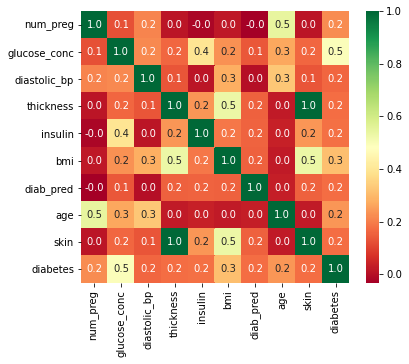

In [68]:
# correalation heatmap
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize= (6,5))
g = sns.heatmap(data[top_corr_features].corr(), annot= True, cmap = 'RdYlGn',fmt ='.1f')

# categorial variable encoding

In [69]:
#changing boolean to number
diabetes_map = {True: 1, False: 0}
data['diabetes']= data['diabetes'].map(diabetes_map)

In [70]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1.379000,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,1.142600,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,0.809136,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0.906200,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1.379000,1


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    float64
 2   diastolic_bp  768 non-null    float64
 3   thickness     768 non-null    float64
 4   insulin       768 non-null    float64
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 60.1 KB


# Build models

In [72]:
# make  x and y data
x_data = data.drop(['diabetes'], axis = 1) # axis= 1 is for column data
x_data.head()
y = data.diabetes
print(y[0:5,]) # print five rows values

0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64


In [73]:
#Start Building the models
from sklearn.model_selection import train_test_split

In [74]:
#spliting train and test data
x= data.drop(['diabetes'], axis= 1)
y= data.diabetes.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 0)

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### make pipeline of classifiers

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [77]:
names = ["Decision Tree", 
         "Random Forest",
         "Naive Bayes", 
         "Logistic Regression",
         "Support Vector Machine",
         "XGboost"]

classifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1),
    GaussianNB(),
    LogisticRegression(),
    SVC(random_state= 1),
    xgb.XGBClassifier()]



store_classifiers = {}
for name, clf in zip(names, classifiers):
    clf.fit(x_train, y_train)
    store_classifiers[name]=clf

In [78]:
# find accurecy of test
# accurecy is (tp+tn)/(all)
# precision=positive predictive value(ppv)= tp/(tp+fp)
# recall = sensitivity = tp/(tp+fn)
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [79]:
for name,clf in store_classifiers.items():
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    prf1_score = precision_recall_fscore_support(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)
    total_report = classification_report(y_test,y_pred)
    print('\n')
    print(name)
    print('Accuracy: ' , accuracy)
    print('Balanced Accuracy: ' ,balanced_accuracy)
    print('Precision/Recall/F1 score: ' ,prf1_score)
    print('Confusion Matrix: ' ,conf_matrix)
    print('AUC: ' ,auc_score)
    print(total_report)



Decision Tree
Accuracy:  0.7662337662337663
Balanced Accuracy:  0.7601908928216345
Precision/Recall/F1 score:  (array([0.87368421, 0.59322034]), array([0.77570093, 0.74468085]), array([0.82178218, 0.66037736]), array([107,  47], dtype=int64))
Confusion Matrix:  [[83 24]
 [12 35]]
AUC:  0.7601908928216345
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       107
           1       0.59      0.74      0.66        47

    accuracy                           0.77       154
   macro avg       0.73      0.76      0.74       154
weighted avg       0.79      0.77      0.77       154



Random Forest
Accuracy:  0.7987012987012987
Balanced Accuracy:  0.711970570689998
Precision/Recall/F1 score:  (array([0.80645161, 0.76666667]), array([0.93457944, 0.4893617 ]), array([0.86580087, 0.5974026 ]), array([107,  47], dtype=int64))
Confusion Matrix:  [[100   7]
 [ 24  23]]
AUC:  0.7119705706899979
              precision    recall  f1-score   support


In [80]:
## Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'learning_rate':learning_rate,
    'booster':booster,
    'base_score':base_score
    }

In [81]:
# Set up the random search with 4-fold cross validation
import xgboost
c1=xgboost.XGBClassifier()

from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=c1,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [82]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 tasks      | elapsed:   10.4s
[Parallel(n_jobs=4)]: Done 210 tasks      | elapsed:   23.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   27.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           validate_parameters=None,
                                           verbosity=None),
                   iid='deprecated', n_iter=50, n_j

In [83]:
random_cv.best_estimator_

XGBClassifier(base_score=0.75, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=0, scale_pos_weight=1, subsample=None,
              tree_method=None, validate_parameters=1, verbosity=None)

In [84]:
final_classifier=xgboost.XGBClassifier(base_score=0.75, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=None, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=0, scale_pos_weight=1, subsample=None,
              tree_method=None, validate_parameters=1, verbosity=None)

In [85]:
final_classifier.fit(x_train,y_train)
y_pred1 = final_classifier.predict(x_test)

In [86]:
accuracy = accuracy_score(y_test, y_pred1)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
prf1_score = precision_recall_fscore_support(y_test, y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
auc_score = roc_auc_score(y_test,y_pred)
total_report = classification_report(y_test,y_pred)
print('\n')
print(name)
print('Accuracy: ' , accuracy)
print('Balanced Accuracy: ' ,balanced_accuracy)
print('Precision/Recall/F1 score: ' ,prf1_score)
print('Confusion Matrix: ' ,conf_matrix)
print('AUC: ' ,auc_score)
print(total_report)



XGboost
Accuracy:  0.8116883116883117
Balanced Accuracy:  0.8261085702923046
Precision/Recall/F1 score:  (array([0.91666667, 0.67241379]), array([0.82242991, 0.82978723]), array([0.86699507, 0.74285714]), array([107,  47], dtype=int64))
Confusion Matrix:  [[88 19]
 [ 8 39]]
AUC:  0.8261085702923046
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       107
           1       0.67      0.83      0.74        47

    accuracy                           0.82       154
   macro avg       0.79      0.83      0.80       154
weighted avg       0.84      0.82      0.83       154



The final accurecy is 81.2 percent which is satisfactory for this project.